In [7]:
from pyspark.sql import SparkSession
from vars import *
from datetime import date
from functions import loadConfigs
from delta import *
from pyspark.sql.functions import current_date
from pyspark.sql.functions import month, year
from columns import awardings
from pyspark.sql.functions import col, explode

builder = loadConfigs(SparkSession.builder)
spark = configure_spark_with_delta_pip(builder).getOrCreate()

today = date.today().strftime('%Y%m%d')
# today = 20230326

output_file = "awardings"

df = spark.read.format("delta").load(f"s3a://{minio_bucket}/gold/gildings/top_subreddits")

In [8]:
df.show()

+----+-----+--------------------+------------------+----------------+--------------------+-----------+
|year|month|           subreddit|total_silver_gilds|total_gold_gilds|total_platinum_gilds|total_gilds|
+----+-----+--------------------+------------------+----------------+--------------------+-----------+
|2023|    6|          midjourney|                 1|               5|                   0|          6|
|2023|    6|                 ask|                 0|               0|                   0|          0|
|2023|    6|      NintendoSwitch|                 0|               0|                   0|          0|
|2023|    6|          Serverlife|                 0|               0|                   0|          0|
|2023|    6|                hmmm|                 0|               0|                   0|          0|
|2023|    5|            facepalm|                 0|               0|                   0|          0|
|2023|    5|     leagueoflegends|                 0|               0|    

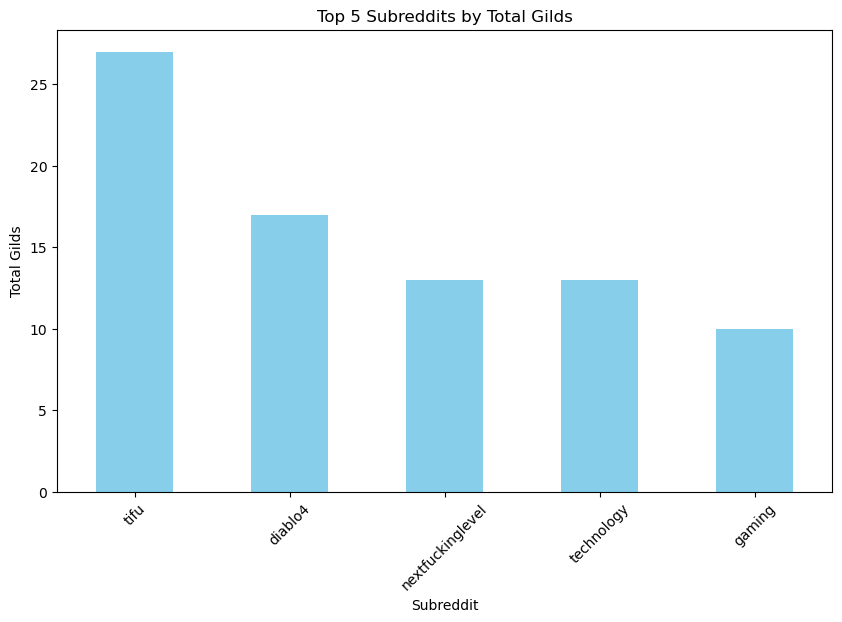

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

pandas_df = df.toPandas()
# Group the data by subreddit and calculate the total gilds for each subreddit
subreddit_gilds = pandas_df.groupby('subreddit')['total_gilds'].sum()

# Get the top 5 subreddits based on total gilds
top_5_subreddits = subreddit_gilds.nlargest(5)

# Create the bar graph
plt.figure(figsize=(10, 6))
top_5_subreddits.plot(kind='bar', color='skyblue')

# Set the title and axis labels
plt.title('Top 5 Subreddits by Total Gilds')
plt.xlabel('Subreddit')
plt.ylabel('Total Gilds')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the bar graph
plt.show()